In [2]:
%matplotlib notebook

import matplotlib
import matplotlib.pyplot as plt
import control

from control.matlab import *

import numpy as np
from ipywidgets import interact, IntSlider

<IPython.core.display.Javascript object>


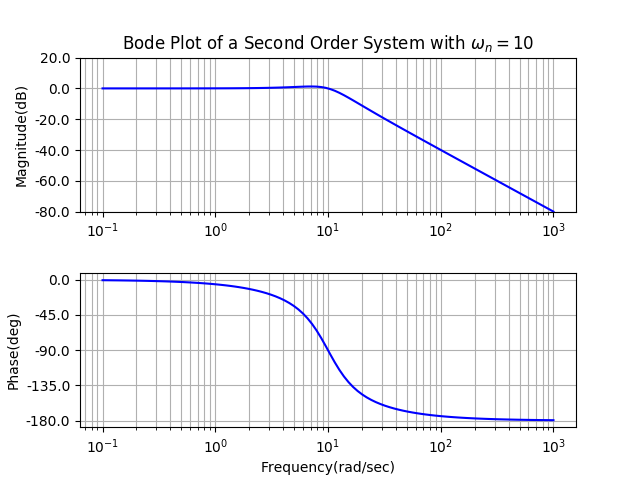

In [9]:
wn = 10;
zeta = 0.5;

plt.subplots_adjust(hspace=0.4)

num = [1];
den = [1/wn/wn, 2*zeta/wn, 1];
sys = tf(num, den);
mag, phase, omega = control.bode_plot(sys, dB=True, Plot=False, omega=np.logspace(-1,3,100));

plt.subplot(211)
magplot, = plt.semilogx(omega, mag, 'b')

plt.subplot(212)
phaseplot, = plt.semilogx(omega, phase,'b')

plt.subplot(211)    
plt.title('Bode Plot of a Second Order System with $\omega_n=10$')
plt.ylabel('Magnitude(dB)')
yticks = np.linspace(20, -80, 6) 
ylabels = [(str(ytick)) for ytick in yticks]
plt.yticks(yticks, ylabels)
plt.grid(b=True, which='both')
plt.ylim(-80, 20)

plt.subplot(212)
plt.ylabel('Phase(deg)')
plt.xlabel('Frequency(rad/sec)')
yticks = np.linspace(-180, 0, 5) 
ylabels = [(str(ytick)) for ytick in yticks]
plt.yticks(yticks, ylabels)
plt.grid(b=True, which='both')


In [10]:
@interact(zeta10=IntSlider(min=1, max=10, value=5))
def plot(zeta10):
    global magplot
    global phaseplot
    magplot.remove()
    phaseplot.remove()
    zeta = zeta10/10
    num = [1];
    den = [1/wn/wn, 2*zeta/wn, 1];
    sys = tf(num, den);
    mag, phase, omega = control.bode_plot(sys, dB=True, Plot=False, omega=np.logspace(-1,3,100));
    
    plt.subplot(211)
    magplot, = plt.semilogx(omega, mag, 'b')
    
    plt.subplot(212)
    phaseplot, = plt.semilogx(omega, phase,'b')